In [1]:
# prepare data for GRU
from pandas import DataFrame
from pandas import read_csv
from numpy import array
from numpy import sqrt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import GRU
from keras.layers import Dense
from keras.layers import SpatialDropout1D
import matplotlib.pyplot as plt

In [2]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# load dataset
dataset = read_csv('/content/drive/My Drive/fusedData158324.csv', header=0, index_col=0)
mean_value = dataset['vehiclecount'].mean()
dataset['vehiclecount'].fillna(value=mean_value, inplace=True)

values = dataset.values

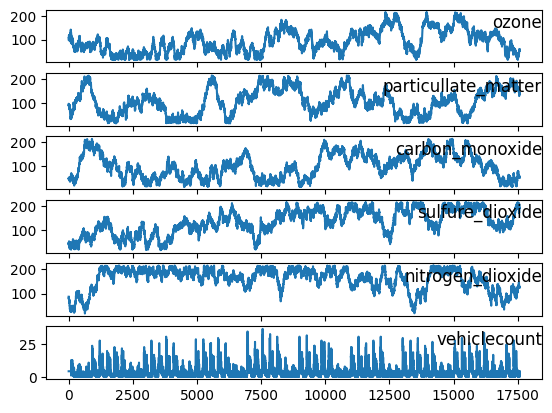

In [5]:
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [6]:
# ensure all data is float
values = values.astype('float32')

In [7]:
# choose a number of time steps
n_steps = 132

In [8]:
# convert into input/output
X, y = split_sequences(values, n_steps)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [9]:
# reshape the data
n_features = X.shape[2]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] * n_features))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] * n_features))

In [10]:
...
# define model
model = Sequential()
model.add(GRU(200, input_shape=(n_steps * n_features, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [11]:
# fit network
history = model.fit(x_train, y_train, epochs=50, batch_size=100, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
140/140 - 15s - loss: 26.5046 - val_loss: 25.4890 - 15s/epoch - 106ms/step
Epoch 2/50
140/140 - 7s - loss: 25.2798 - val_loss: 24.5297 - 7s/epoch - 47ms/step
Epoch 3/50
140/140 - 8s - loss: 24.0560 - val_loss: 22.8832 - 8s/epoch - 58ms/step
Epoch 4/50
140/140 - 7s - loss: 22.5911 - val_loss: 23.1010 - 7s/epoch - 48ms/step
Epoch 5/50
140/140 - 7s - loss: 21.0958 - val_loss: 19.7969 - 7s/epoch - 48ms/step
Epoch 6/50
140/140 - 7s - loss: 19.4208 - val_loss: 17.5873 - 7s/epoch - 48ms/step
Epoch 7/50
140/140 - 7s - loss: 18.1963 - val_loss: 16.8966 - 7s/epoch - 49ms/step
Epoch 8/50
140/140 - 7s - loss: 18.1175 - val_loss: 15.0056 - 7s/epoch - 48ms/step
Epoch 9/50
140/140 - 7s - loss: 15.7868 - val_loss: 15.2419 - 7s/epoch - 49ms/step
Epoch 10/50
140/140 - 7s - loss: 14.0572 - val_loss: 14.7372 - 7s/epoch - 48ms/step
Epoch 11/50
140/140 - 7s - loss: 17.2322 - val_loss: 21.0790 - 7s/epoch - 48ms/step
Epoch 12/50
140/140 - 7s - loss: 14.7676 - val_loss: 12.7899 - 7s/epoch - 48ms/ste

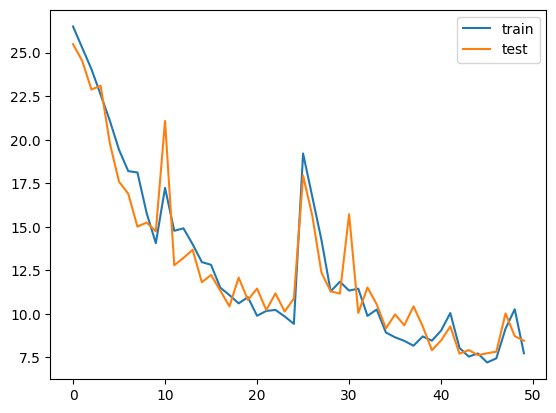

In [12]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [13]:
y_pred = model.predict(x_test)
y_pred = y_pred.reshape(y_pred.shape[0])

109/109 [==============================] - 2s 11ms/step


In [14]:
print("RMSE on Test Data = ", sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE on Test Data = ", metrics.mean_absolute_error(y_test, y_pred))
print("R2 on Test Data = ", metrics.r2_score(y_test, y_pred))

RMSE on Test Data =  2.907483
MAE on Test Data =  2.0391202
R2 on Test Data =  0.6784007815613413


In [15]:
df1 = DataFrame({'Actual': y_test, 'Predicted': y_pred, 'variance': y_test - y_pred})
df1.head()

,Actual,Predicted,variance
0,3.0,5.085438,-2.085438
1,3.0,2.151579,0.848421
2,0.0,1.790548,-1.790548
3,5.0,5.421242,-0.421242
4,19.0,12.624642,6.375358


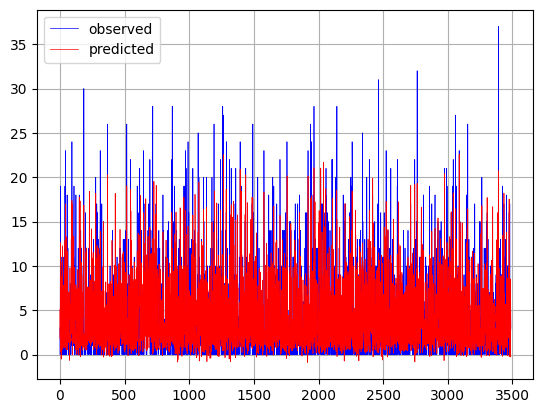

In [16]:
x_ax = range(len(x_test))
plt.plot(x_ax, y_test, lw=0.5, color='blue', label='observed')
plt.plot(x_ax, y_pred, lw=0.5, color='red', label='predicted')
plt.legend(loc='best')
plt.grid()
